<a href="https://colab.research.google.com/github/HatemGamal/ElectroPi/blob/main/OCR_for_National_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [19]:
#If you want to know for a specific pip package installation path you can always use
!pip show pytesseract

Name: pytesseract
Version: 0.3.10
Summary: Python-tesseract is a python wrapper for Google's Tesseract-OCR
Home-page: https://github.com/madmaze/pytesseract
Author: Samuel Hoffstaetter
Author-email: samuel@hoffstaetter.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, Pillow
Required-by: 


In [20]:
#If you want to install Arabic for example in Google Colab
#download the file
! wget https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/ara.traineddata

--2023-11-05 22:14:20--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/master/ara.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12603724 (12M) [application/octet-stream]
Saving to: ‘ara.traineddata’

ara.traineddata     100%[===================>]  12.02M  --.-KB/s    in 0.1s    

2023-11-05 22:14:21 (93.6 MB/s) - ‘ara.traineddata’ saved [12603724/12603724]



In [21]:
#Then move it to Tessdata path
! sudo mv "/content/ara.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata"

In [14]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [54]:
from google.colab import files
uploaded = files.upload()

Saving Father ID.JPG to Father ID.JPG


In [17]:
pytesseract.get_languages(config='')

['eng', 'osd']

In [56]:
image_path_in_colab='/content/Father ID.JPG'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

KINGDOM OF SAUDI ARABIA
MINISTRY OF INTERIOR

ae L oe lak hae ll Encik
DRG AMALERN SAAD ABBAS eae
AAT } o ait

 

      
     
 

Seva”
AUNT \ 5 EEE ATO
ea gdnell j jAnial! olga! 2S xo



# New Section

In [57]:
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab), lang='ara')
print(extractedInformation)

ماقمعم اصنلمك 07 110160011
0101760 0101577

جل الدين عد عباس ماري 1 م
55 كقوقم امد ال ل
الرقم © 9 احم

 

      
     
 

اا الديانة 1
مره 6 تا لديهما
شركة الاطباء المتحدون المعدودة



In [29]:
import cv2
import numpy as np

In [58]:
img = cv2.imread(image_path_in_colab,0)

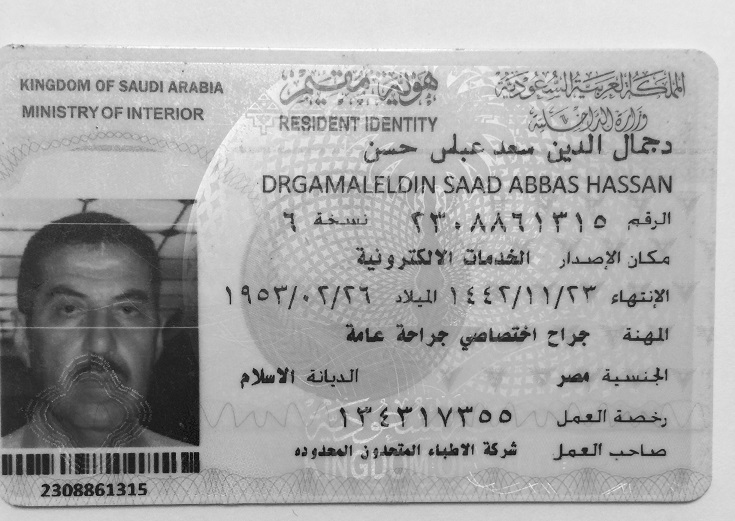

In [59]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [60]:
extractedInformation = pytesseract.image_to_string(img, lang='ara')
print(extractedInformation)

ماقمعم انلمك 07 100160011
117610 ع0 01101577

 

لكك كف88م مححك اا لطاع اغاا866ط
الرقم - ‎١5‏ أ ار ااا تسح 1
مكان الإصدار الخدمات الالكترونية

الإنتهاء ؟/117/؟62 ‎١‏ يلاد ‎١167/4/55‏
‏الهنة جزاح اختصاصي جراحة عافة

الجنسية مصر الديانة الاسلام

رخضة العمل 88 1471177
صاحب العمل شركة الاطباء المتحدو المعدوده

     
  
 
   
 

7

ال
23068861315



## **Image Preprocessing**

In [31]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [35]:
import matplotlib.pyplot as plt


(<Axes: >, <matplotlib.image.AxesImage at 0x7dd98ed21f30>)

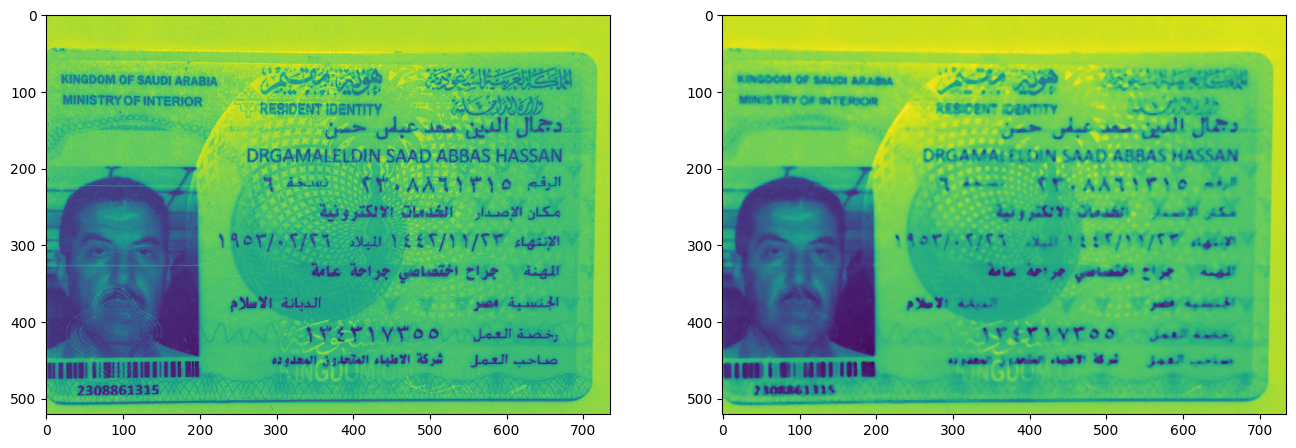

In [77]:
img2 = remove_noise(img)
plt.figure(figsize=(16,10))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(img2)


In [73]:
extractedInformation = pytesseract.image_to_string(img2, lang='ara+eng')
print(extractedInformation)

mance (SCG ‏موصعم‎

; Fa sips! ‘set
‏سعد عباس حسن‎ 2
‘DHGAM4|ELDIN SAAD ABBAS HASSAN
dem TT PAATIV © ‏اقم‎
‎; ‏مكان الإصدار القدمات الالكترونية‎
1157/6/1 ‏لليائد‎ ١655/11/7 agree
Mas Dig gala ‏جراح‎ ugh
‏الديائة الأطلام‎ pat Apel
17171177880 ‏وقعنة العمل‎
angie Jr oly My ‏صاحب العمل‎

  
  
 
   

oe

